In [1]:
import os
import pandas as pd
import wrds
from sqlalchemy import text
import datetime

In [2]:
db = wrds.Connection(wrds_username='krishnapola')

Loading library list...
Done


In [3]:
# Define the directory containing CSV files
directory = 'Quarterly_Segregated'

# Initialize an empty list to store dataframes
dfs = []

# Loop through each file in the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file is a CSV
        if file.endswith('.csv'):
            # Construct the full path to the CSV file
            file_path = os.path.join(root, file)
            # Read the CSV into a dataframe and append it to the list
            df = pd.read_csv(file_path)
            dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

#kCBF.zEqH5*,6:c


In [4]:
df = combined_df
df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id
0,APPALOOSA LP,INAMED Corp.,IMDC,2001-03-31,SH,8287488.0,104975000.0,0.0,0.0,47.4170,NaN,1,999999,NaN,new,HEALTH CARE,101797
1,APPALOOSA LP,Finova Financial Trust TOPrS Conv. Securities,FNVGPRA,2001-03-31,SH,1258200.0,30196000.0,0.0,0.0,13.6395,NaN,2,999999,NaN,new,FINANCE,109263
2,APPALOOSA LP,La Quinta Corp.,LQI,2001-03-31,SH,4400000.0,17952000.0,0.0,0.0,8.1089,NaN,3,999999,NaN,new,FINANCE,102527
3,APPALOOSA LP,Beverly Enterprises Inc. (New),BEV,2001-03-31,SH,1868000.0,14944000.0,0.0,0.0,6.7502,NaN,4,999999,NaN,new,HEALTH CARE,98381
4,APPALOOSA LP,Chesapeake Energy Corp,CHKAQ,2001-03-31,SH,7536.0,13339000.0,0.0,0.0,6.0252,NaN,5,999999,NaN,new,ENERGY,3533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111092,"TRIAN FUND MANAGEMENT, L.P.",Invesco Ltd. ADR,IVZ,2023-12-31,SH,33940096.0,605491313.0,33940096.0,492810194.0,8.6416,7.4957,5,5,0.000000,NaN,FINANCE,4886
111093,"TRIAN FUND MANAGEMENT, L.P.",General Electric Co,GE,2023-12-31,SH,4030213.0,514376085.0,4029840.0,445498812.0,7.3412,6.7761,6,6,0.009256,addition,INDUSTRIALS,114
111094,"TRIAN FUND MANAGEMENT, L.P.",Allstate Corp (The),ALL,2023-12-31,SH,2793098.0,390977858.0,3643618.0,405935481.0,5.5800,6.1743,7,7,-23.342732,reduction,FINANCE,365
111095,"TRIAN FUND MANAGEMENT, L.P.",GE HealthCare Technologies Inc,GEHC,2023-12-31,SH,1342833.0,103827848.0,1342830.0,91366153.0,1.4818,1.3897,8,8,0.000223,addition,NaN,294329


In [5]:
tickers_list = df['Stock Ticker'].unique().tolist()
dates = df["Quarter Date"].unique().tolist()


# Join formatted dates into a string for SQL query
sql_date_string = ', '.join([f"'{date}'" for date in dates])
sql_ticker_string = ', '.join([f"'{ticker}'" for ticker in tickers_list])


In [6]:
query = f"""
SELECT b.date, a.ticker, b.shrout
FROM crsp.dse a
LEFT JOIN crsp.msf b ON a.cusip = b.cusip
WHERE a.ticker IN ({sql_ticker_string}) AND b.date IN ({sql_date_string})
"""

data_df = db.raw_sql(query)
data_df

,date,ticker,shrout
0,2016-09-30,AEPI,5114.0
1,2016-06-30,AEPI,5114.0
2,2016-03-31,AEPI,5107.0
3,2015-12-31,AEPI,5103.0
4,2015-09-30,AEPI,5103.0
...,...,...,...
381440,2011-09-30,TSLA,104189.0
381441,2015-03-31,TSLA,126362.0
381442,2011-06-30,TSLA,103981.0
381443,2011-03-31,TSLA,95555.0


In [7]:
data_df.rename(columns={'date': 'Quarter Date', 'ticker': 'Stock Ticker'}, inplace=True)

In [8]:
# Convert 'Quarter Date' column to datetime type
data_df['Quarter Date'] = pd.to_datetime(data_df['Quarter Date'])

# Ensure the 'Stock Ticker' column values are of string type
data_df['Stock Ticker'] = data_df['Stock Ticker'].astype(str)

df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
# Ensure the 'Stock Ticker' column values are of string type
df['Stock Ticker'] = df['Stock Ticker'].astype(str)
data_df.dropna(subset=['Quarter Date', 'Stock Ticker'], inplace=True)
df.dropna(subset=['Quarter Date', 'Stock Ticker'], inplace=True)
data_df.drop_duplicates(inplace=True)

In [9]:
df[(df['Quarter Date'] ==  '2008-03-31') & (df['Stock Ticker'] == 'JJSF')]


,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id
73897,SOROS FUND MANAGEMENT LLC,J & J Snack Foods Corp.,JJSF,2008-03-31,SH,8639.0,237000.0,0.0,0.0,0.011,NaN,315,999999,NaN,new,CONSUMER STAPLES,2743


In [10]:
data_df[(data_df['Quarter Date'] ==  '2008-03-31') & (data_df['Stock Ticker'] == 'JJSF')]


,Quarter Date,Stock Ticker,shrout
92,2008-03-31,JJSF,18676.0


In [11]:
merged_df = pd.merge(df, data_df, on=['Quarter Date', 'Stock Ticker'], how='left')

In [12]:
non_nan_rows = merged_df[merged_df['shrout'].notna()]


In [13]:
cleaned_df = non_nan_rows.copy()

In [14]:
cleaned_df['Price'] = cleaned_df['Current Market Value'] / cleaned_df['Current Shares Held']

In [15]:
cleaned_df['Company Market Value'] =  cleaned_df['shrout'] * cleaned_df['Price']

In [16]:
cleaned_df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id,shrout,Price,Company Market Value
53,APPALOOSA LP,INAMED Corp.,IMDC,2001-12-31,SH,8287488.0,165308000.0,8287488.0,93649000.0,37.1990,51.6516,1,1,0.000000,NaN,HEALTH CARE,101797,20200.0,19.946696,4.029233e+05
54,APPALOOSA LP,Kindred Healthcare Inc,KND,2001-12-31,SH,4950854.0,126247000.0,0.0,0.0,28.4092,NaN,2,999999,NaN,new,HEALTH CARE,45660,17683.0,25.500045,4.509173e+05
55,APPALOOSA LP,PG&E Corp. (Pacific Gas & Electric),PCG,2001-12-31,SH,2530000.0,48652000.0,0.0,0.0,10.9481,NaN,3,999999,NaN,new,UTILITIES AND TELECOMMUNICATIONS,4367,387258.0,19.230040,7.446987e+06
59,APPALOOSA LP,Nextel Communications Inc. Class A,NXTL,2001-12-31,SH,1000000.0,10950000.0,575700.0,4934000.0,2.4641,2.7213,7,9,73.701581,addition,INFORMATION TECHNOLOGY,97432,763000.0,10.950000,8.354850e+06
61,APPALOOSA LP,National Health Investors Inc.,NHI,2001-12-31,SH,568500.0,8471000.0,568500.0,7646000.0,1.9062,4.2171,10,6,0.000000,NaN,REAL ESTATE,437,24287.0,14.900616,3.618913e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116799,"TRIAN FUND MANAGEMENT, L.P.",Invesco Ltd. ADR,IVZ,2023-06-30,SH,33940096.0,570533014.0,33940096.0,556617574.0,14.7016,14.8370,4,4,0.000000,NaN,FINANCE,4886,458169.0,16.810000,7.701821e+06
116800,"TRIAN FUND MANAGEMENT, L.P.",Wendys Co. (The),WEN,2023-06-30,SH,20732628.0,450934659.0,21705770.0,472751671.0,11.6198,12.6015,5,5,-4.483333,reduction,CONSUMER DISCRETIONARY,11361,209969.0,21.750000,4.566826e+06
116801,"TRIAN FUND MANAGEMENT, L.P.",General Electric Co,GE,2023-06-30,SH,4028998.0,442585430.0,4028998.0,385172209.0,11.4046,10.2670,6,6,0.000000,NaN,INDUSTRIALS,114,1088960.0,109.850000,1.196223e+08
116802,"TRIAN FUND MANAGEMENT, L.P.",GE HealthCare Technologies Inc,GEHC,2023-06-30,SH,1342830.0,109091509.0,1342830.0,110152345.0,2.8111,2.9362,7,7,0.000000,NaN,NaN,294329,454809.0,81.240000,3.694868e+07


In [17]:

# Group by 'Filer Name' and 'Quarter Date'
grouped = cleaned_df.groupby(['Filer Name', 'Quarter Date'])

# Iterate over each group
for group_name, group_data in grouped:
    total_market_value = group_data['Company Market Value'].sum()
    
    # Calculate weights based on market value
    group_data['Weight'] = group_data['Company Market Value'] / total_market_value
    
    # Adjust shares based on weights
    group_data['Adjusted Shares'] = group_data['Weight'] * group_data['Current Shares Held']
    
    # Calculate the new portfolio market value held
    group_data['New Portfolio Market Value'] = group_data['Adjusted Shares'] * group_data['Price']
    
    # Calculate the weight difference
    group_data['Weight Difference'] = group_data['Weight'] - (group_data['New Portfolio Market Value'] / group_data['New Portfolio Market Value'].sum())
    
    # Update DataFrame with adjusted shares
    cleaned_df.loc[group_data.index, 'Adjusted Shares'] = group_data['Adjusted Shares']
    cleaned_df.loc[group_data.index, 'New Portfolio Market Value'] = group_data['New Portfolio Market Value']
    cleaned_df.loc[group_data.index, 'Weight'] = group_data['Weight']
    cleaned_df.loc[group_data.index, 'Weight Difference'] = group_data['Weight Difference']

In [18]:
cleaned_df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,...,Type of Change,Sector,stock_id,shrout,Price,Company Market Value,Adjusted Shares,New Portfolio Market Value,Weight,Weight Difference
53,APPALOOSA LP,INAMED Corp.,IMDC,2001-12-31,SH,8287488.0,165308000.0,8287488.0,93649000.0,37.1990,...,NaN,HEALTH CARE,101797,20200.0,19.946696,4.029233e+05,1.367873e+05,2.728455e+06,0.016505,-0.093099
54,APPALOOSA LP,Kindred Healthcare Inc,KND,2001-12-31,SH,4950854.0,126247000.0,0.0,0.0,28.4092,...,new,HEALTH CARE,45660,17683.0,25.500045,4.509173e+05,9.144870e+04,2.331946e+06,0.018471,-0.075205
55,APPALOOSA LP,PG&E Corp. (Pacific Gas & Electric),PCG,2001-12-31,SH,2530000.0,48652000.0,0.0,0.0,10.9481,...,new,UTILITIES AND TELECOMMUNICATIONS,4367,387258.0,19.230040,7.446987e+06,7.717944e+05,1.484164e+07,0.305057,-0.291142
59,APPALOOSA LP,Nextel Communications Inc. Class A,NXTL,2001-12-31,SH,1000000.0,10950000.0,575700.0,4934000.0,2.4641,...,addition,INFORMATION TECHNOLOGY,97432,763000.0,10.950000,8.354850e+06,3.422466e+05,3.747601e+06,0.342247,0.191703
61,APPALOOSA LP,National Health Investors Inc.,NHI,2001-12-31,SH,568500.0,8471000.0,568500.0,7646000.0,1.9062,...,NaN,REAL ESTATE,437,24287.0,14.900616,3.618913e+05,8.427701e+03,1.255779e+05,0.014824,0.009780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116799,"TRIAN FUND MANAGEMENT, L.P.",Invesco Ltd. ADR,IVZ,2023-06-30,SH,33940096.0,570533014.0,33940096.0,556617574.0,14.7016,...,NaN,FINANCE,4886,458169.0,16.810000,7.701821e+06,5.585699e+05,9.389560e+06,0.016458,-0.006805
116800,"TRIAN FUND MANAGEMENT, L.P.",Wendys Co. (The),WEN,2023-06-30,SH,20732628.0,450934659.0,21705770.0,472751671.0,11.6198,...,reduction,CONSUMER DISCRETIONARY,11361,209969.0,21.750000,4.566826e+06,2.023205e+05,4.400471e+06,0.009759,-0.001143
116801,"TRIAN FUND MANAGEMENT, L.P.",General Electric Co,GE,2023-06-30,SH,4028998.0,442585430.0,4028998.0,385172209.0,11.4046,...,NaN,INDUSTRIALS,114,1088960.0,109.850000,1.196223e+08,1.029865e+06,1.131306e+08,0.255613,-0.024664
116802,"TRIAN FUND MANAGEMENT, L.P.",GE HealthCare Technologies Inc,GEHC,2023-06-30,SH,1342830.0,109091509.0,1342830.0,110152345.0,2.8111,...,NaN,NaN,294329,454809.0,81.240000,3.694868e+07,1.060208e+05,8.613130e+06,0.078953,0.057615


In [19]:
def identify_strong_conviction_managers(df):
    # Convert 'Quarter Date' to datetime if it's not already in datetime format
    df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
    
    # Extract year from 'Quarter Date'
    df['Year'] = df['Quarter Date'].dt.year
    
    # Group by 'Filer Name' and 'Year'
    grouped = df.groupby(['Filer Name', 'Year'])
    
    # Calculate median portfolio tilt (weight difference) for each manager within each year
    median_tilt = grouped['Weight Difference'].median()
    
    # Determine the top 30th percentile of managers based on median portfolio tilt
    top_30_percentile = median_tilt.groupby(level='Year').apply(lambda x: x.quantile(0.7))
    
    # Identify managers who fall into the top 30th percentile for each year
    strong_conviction_managers = {}
    for year, tilt_threshold in top_30_percentile.items():
        year_mask = df['Year'] == year
        year_df = df[year_mask]
        year_grouped = year_df.groupby('Filer Name')['Weight Difference'].median()
        strong_managers = year_grouped[year_grouped >= tilt_threshold].index.tolist()
        strong_conviction_managers[year] = strong_managers
    
    return strong_conviction_managers

# Call the function with your DataFrame
strong_conviction_managers = identify_strong_conviction_managers(cleaned_df)


In [20]:
strong_conviction_managers

{2001: ['APPALOOSA LP', 'BERKSHIRE HATHAWAY INC', 'THIRD POINT LLC'],
 2002: ['APPALOOSA LP', 'BERKSHIRE HATHAWAY INC', 'THIRD POINT LLC'],
 2003: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'FARALLON CAPITAL MANAGEMENT LLC',
  'ICAHN CARL C'],
 2004: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'ICAHN CARL C'],
 2005: ['BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'ICAHN CARL C',
  'THIRD POINT LLC'],
 2006: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2007: ['BERKSHIRE HATHAWAY INC',
  'ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2008: ['ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.',
  'TIGER GLOBAL MANAGEMENT LLC'],
 2009: ['APPALOOSA LP',
  'ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2010: ['APPALOOSA LP',
  'ICAHN CARL C',
  'PERSHI

In [21]:
def calculate_median_portfolio_tilt(df):
    # Convert 'Quarter Date' to datetime if it's not already in datetime format
    df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
    
    # Extract year from 'Quarter Date'
    df['Year'] = df['Quarter Date'].dt.year
    
    # Group by 'Filer Name' and 'Year'
    grouped = df.groupby(['Filer Name', 'Year'])
    
    # Calculate median portfolio tilt (weight difference) for each manager within each year
    median_tilt = grouped['Weight Difference'].median()
    
    return median_tilt

# Call the function with your DataFrame
median_portfolio_tilt = calculate_median_portfolio_tilt(cleaned_df)

In [22]:
display(median_portfolio_tilt)

Filer Name                   Year
APPALOOSA LP                 2001    0.006666
                             2002    0.009665
                             2003    0.003499
                             2004    0.003401
                             2005    0.000067
                                       ...   
TRIAN FUND MANAGEMENT, L.P.  2019    0.002762
                             2020    0.002304
                             2021   -0.002067
                             2022   -0.044290
                             2023   -0.006611
Name: Weight Difference, Length: 321, dtype: float64

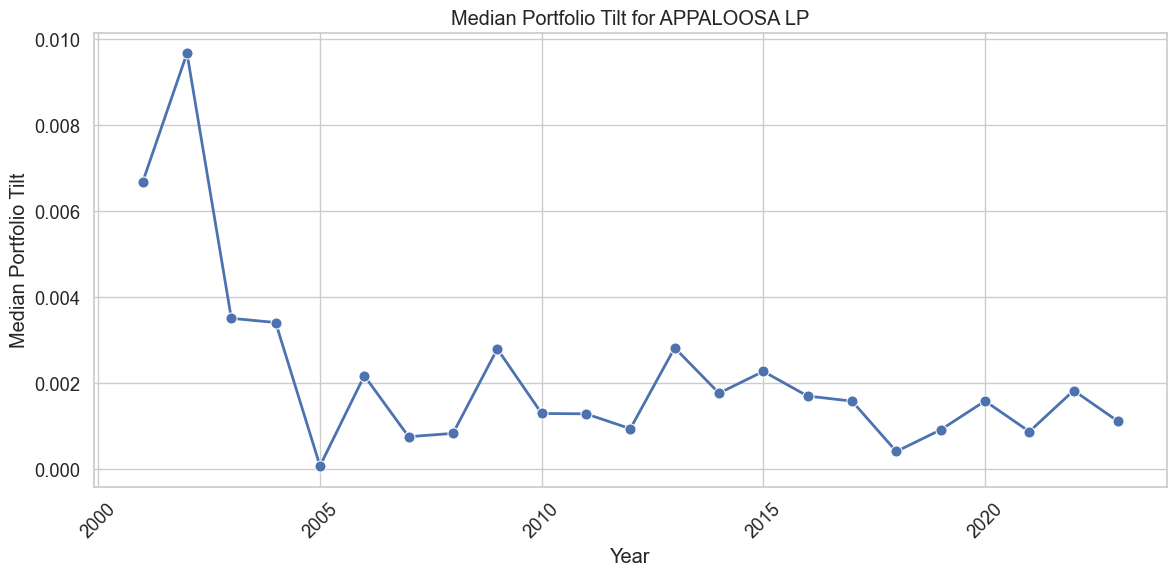

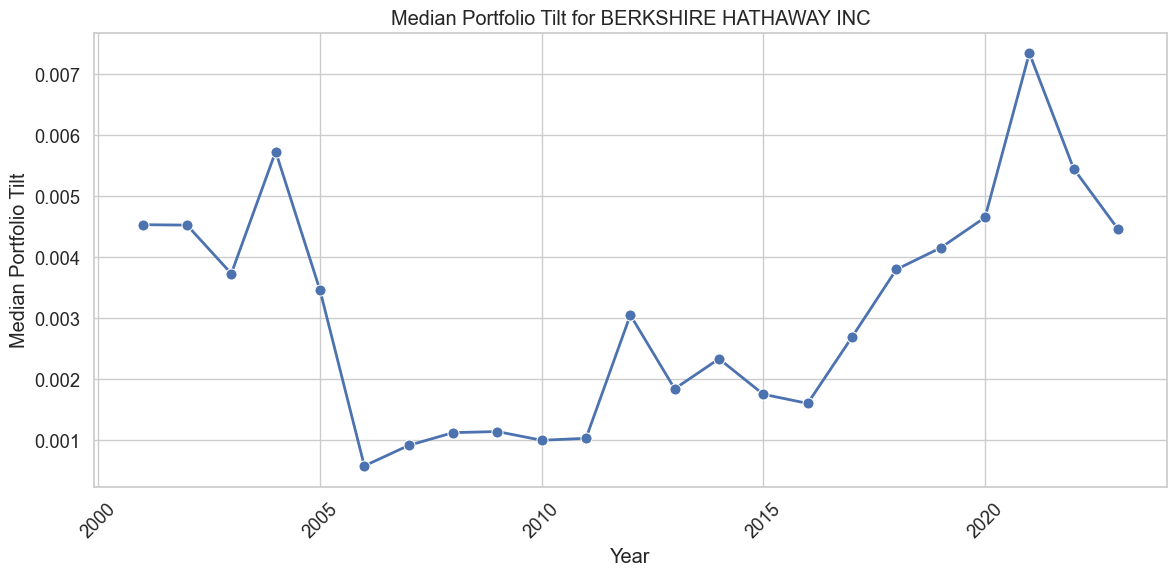

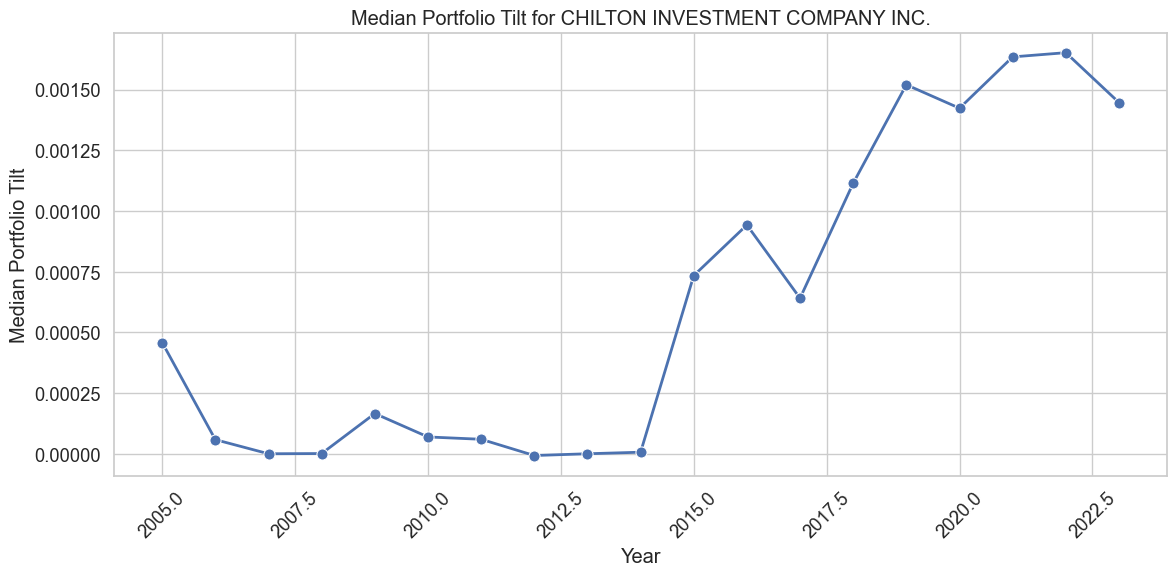

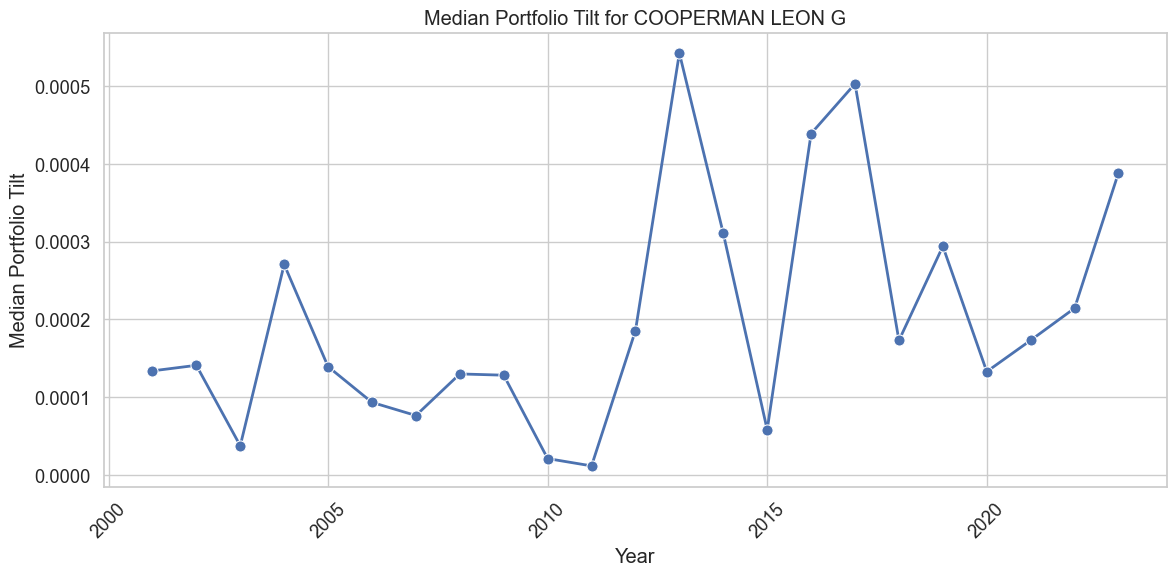

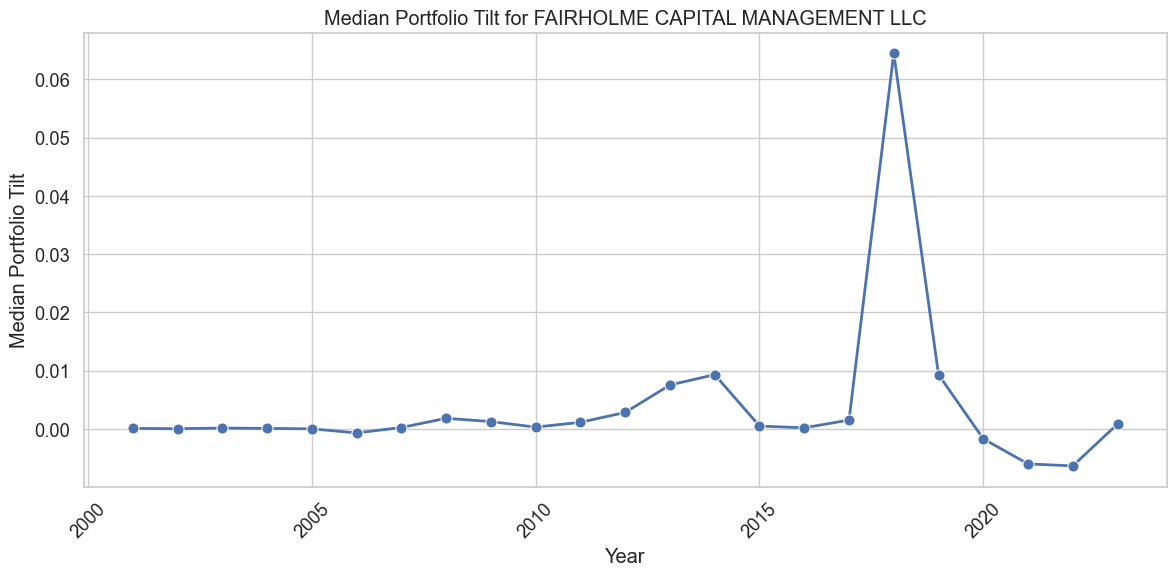

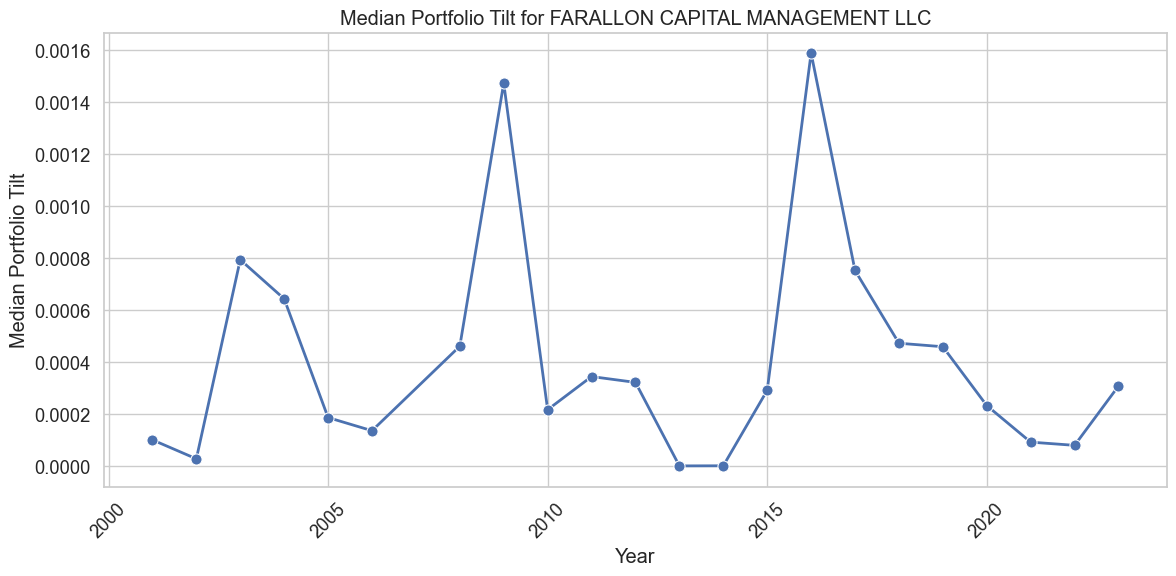

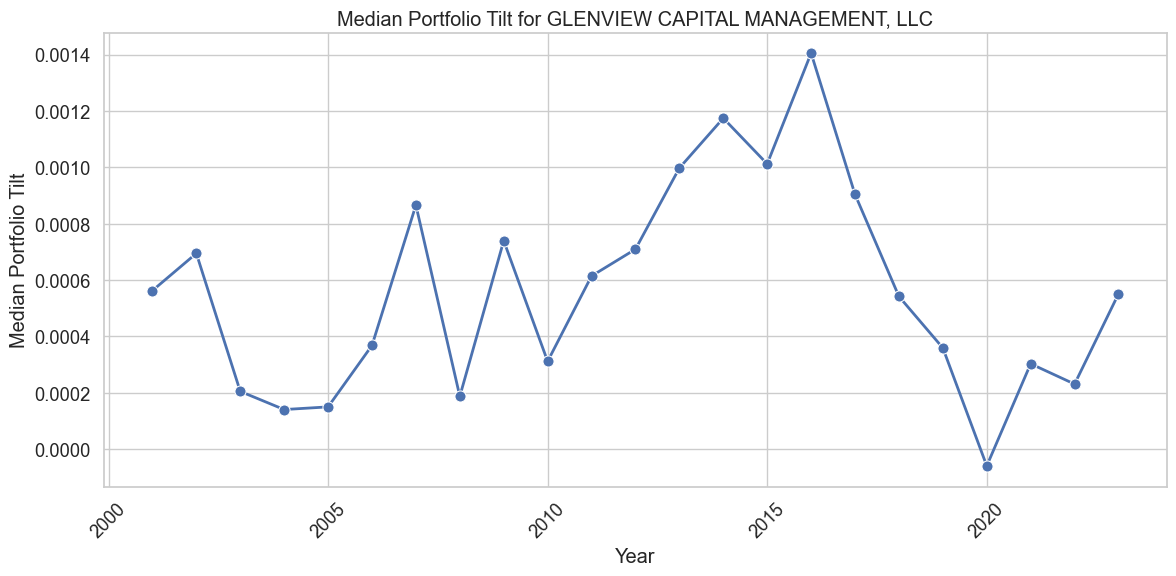

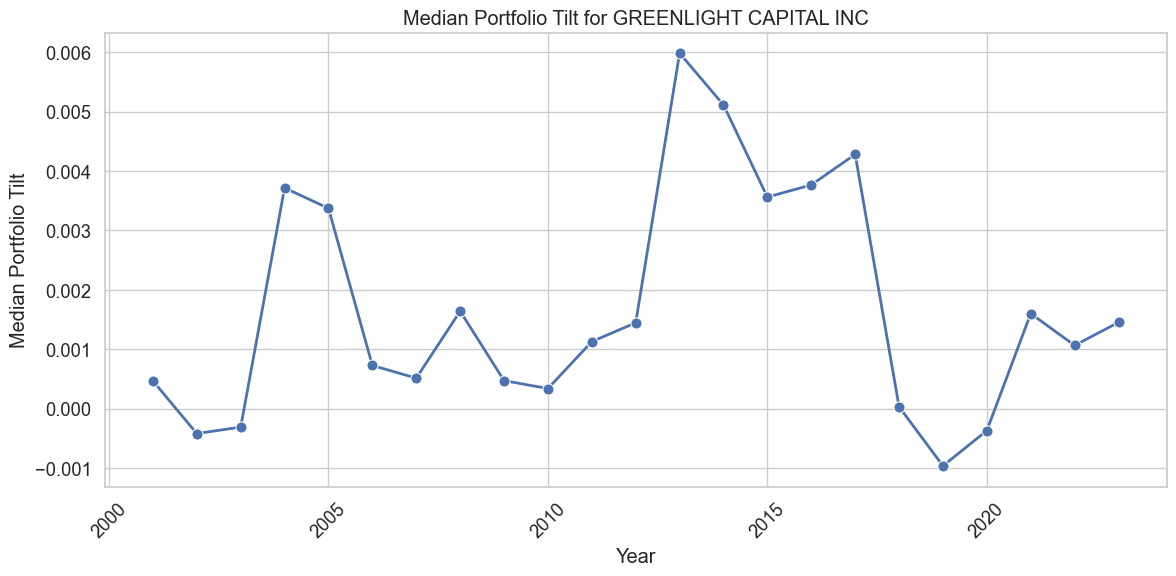

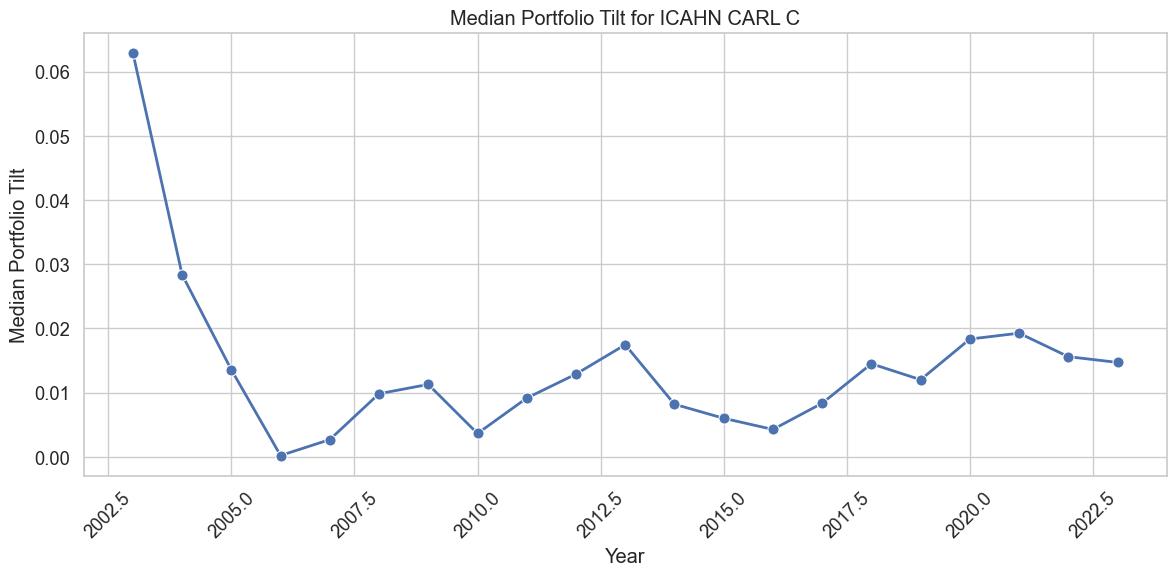

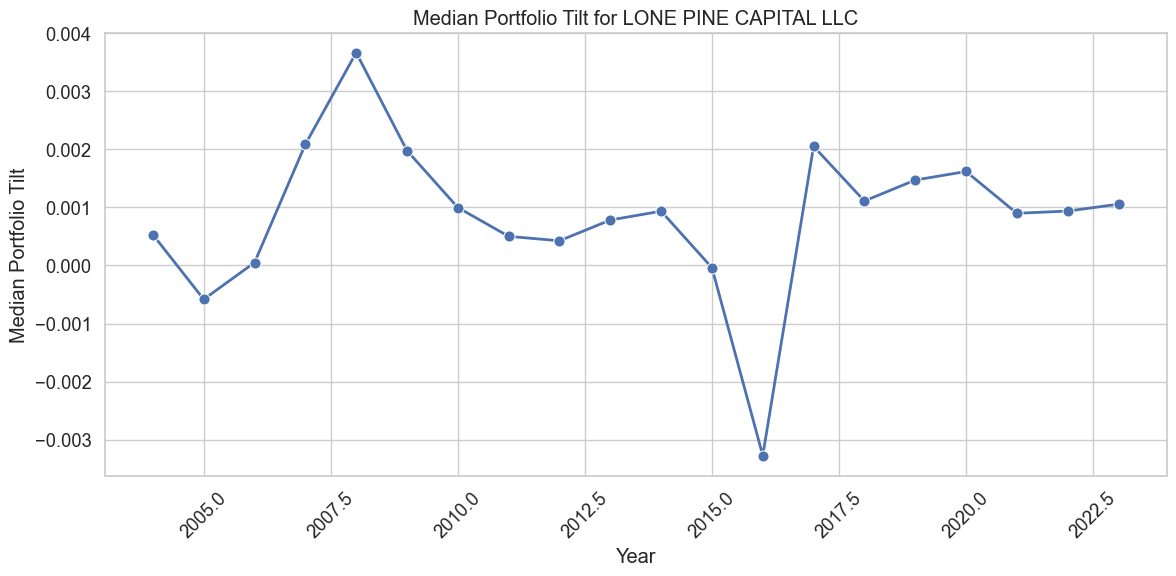

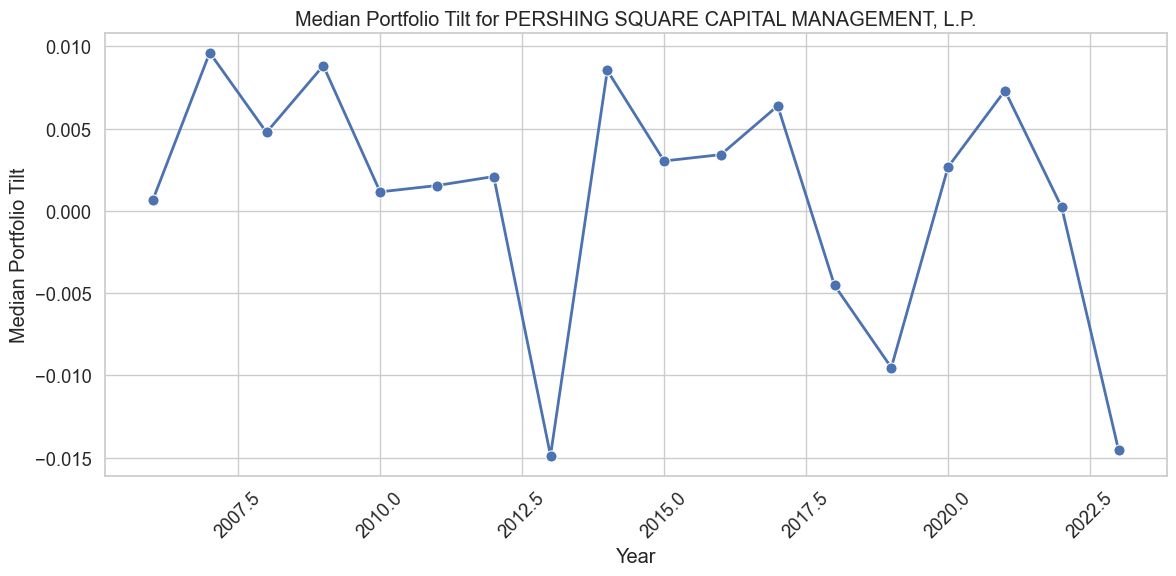

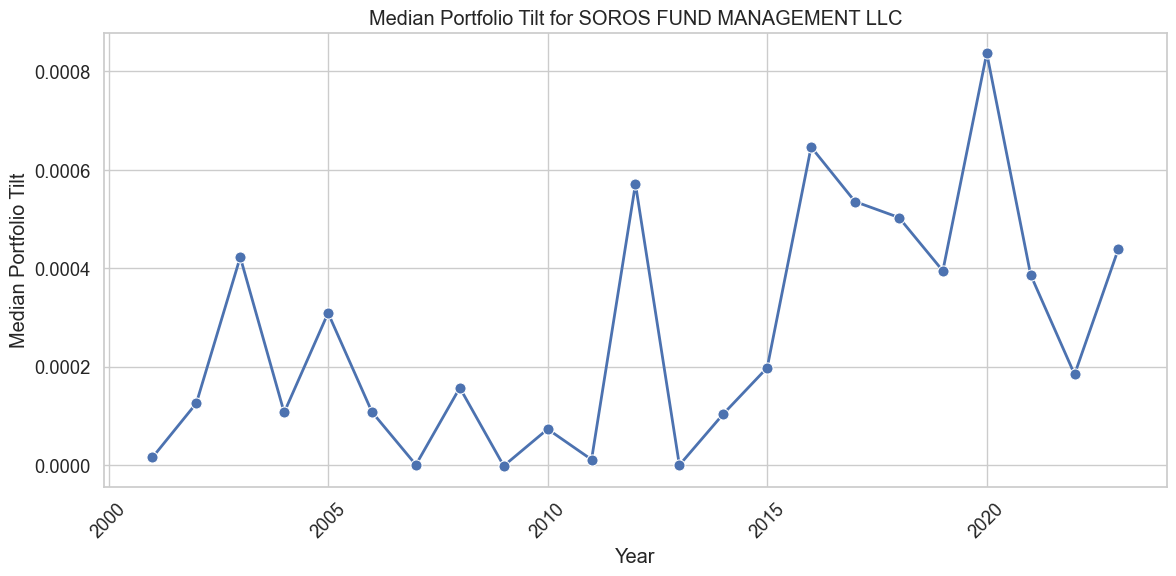

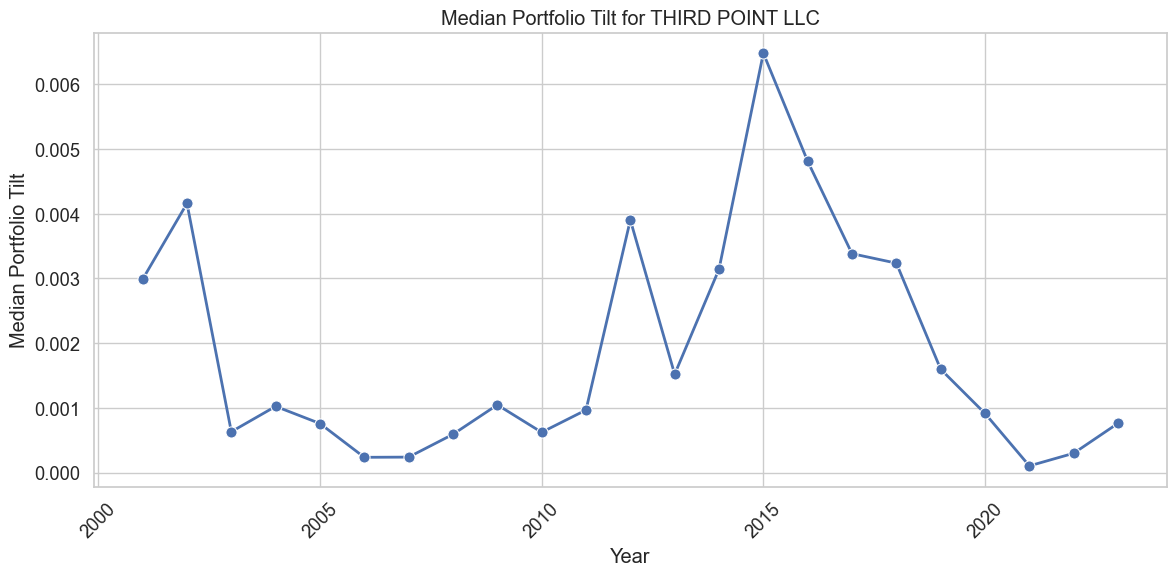

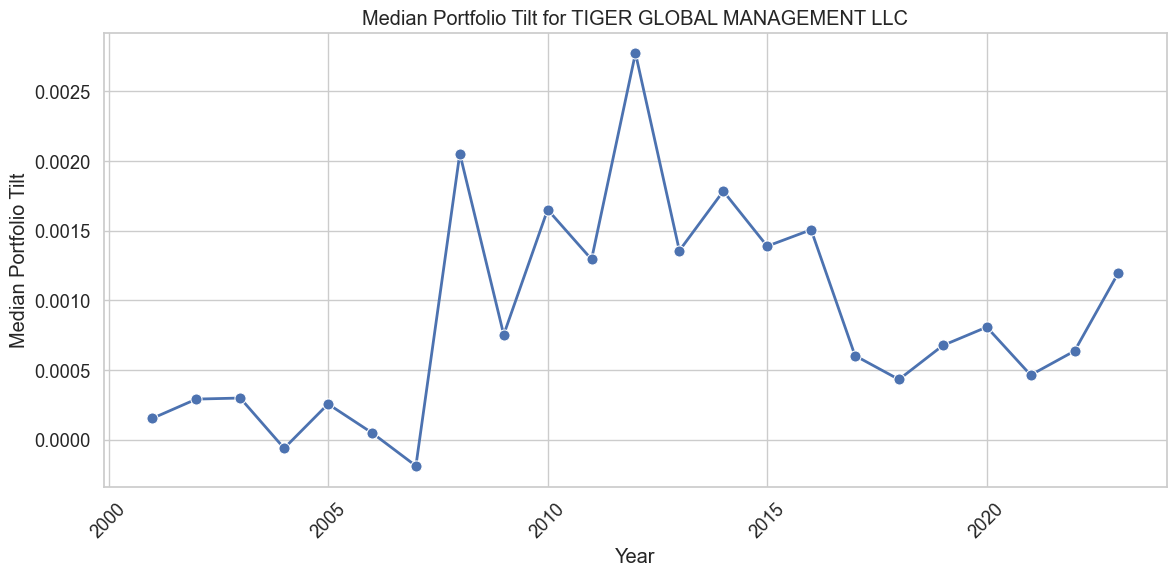

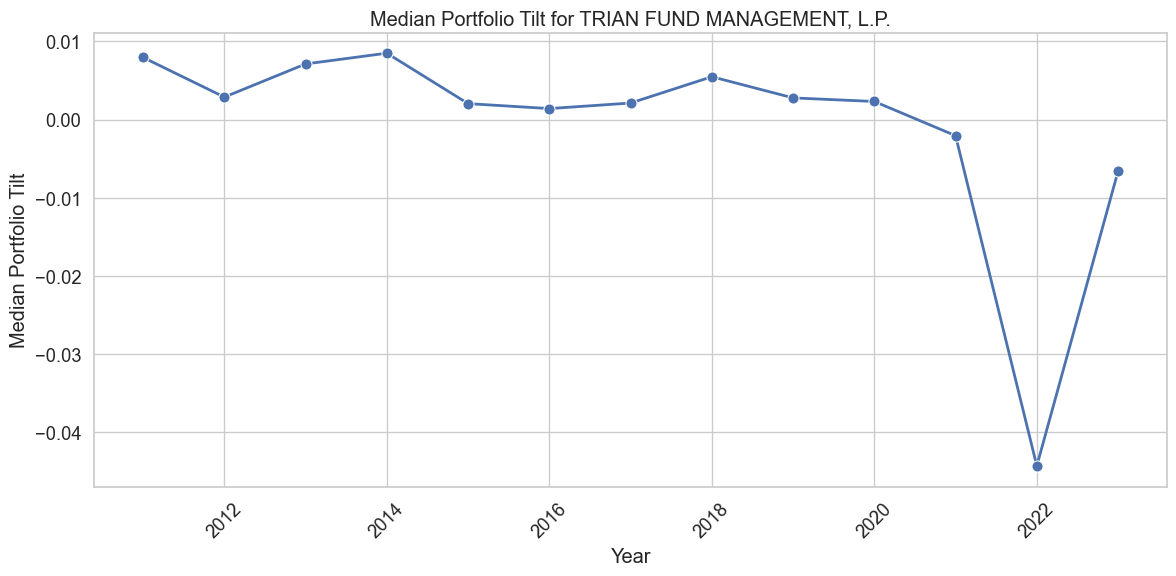

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to access 'Filer Name' and 'Year' as columns
median_portfolio_tilt = median_portfolio_tilt.reset_index()

# Set style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Create separate plots for each manager
for manager in median_portfolio_tilt['Filer Name'].unique():
    plt.figure(figsize=(12, 6))
    manager_data = median_portfolio_tilt[median_portfolio_tilt['Filer Name'] == manager]
    sns.lineplot(data=manager_data, x="Year", y="Weight Difference", marker='o', markersize=8, linewidth=2)
    plt.title(f"Median Portfolio Tilt for {manager}")
    plt.xlabel("Year")
    plt.ylabel("Median Portfolio Tilt")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [28]:
def identify_top_and_lowest_percentile_stocks(df, percentile):
    # Group by 'Quarter Date'
    grouped = df.groupby('Quarter Date')
    
    # Initialize empty dictionaries to store top and lowest percentile stocks
    top_percentile_stocks = {}
    lowest_percentile_stocks = {}
    
    # Iterate over each quarter
    for quarter_date, quarter_data in grouped:
        # Calculate portfolio tilt (weight difference) for each stock within the quarter
        quarter_data['Portfolio Tilt'] = quarter_data['Weight Difference']
        
        # Identify the top and lowest 30th percentile of stocks based on their portfolio tilt
        top_th_percentile = quarter_data.nlargest(int(len(quarter_data) * percentile), 'Portfolio Tilt')['Stock Ticker'].tolist()
        lowest_th_percentile = quarter_data.nsmallest(int(len(quarter_data) * percentile), 'Portfolio Tilt')['Stock Ticker'].tolist()
        
        # Store the lists of stocks for each quarter
        top_percentile_stocks[quarter_date] = top_th_percentile
        lowest_percentile_stocks[quarter_date] = lowest_th_percentile
    
    return top_percentile_stocks, lowest_percentile_stocks

# Call the function with your DataFrame
top_percentile_stocks, lowest_percentile_stocks = identify_top_and_lowest_percentile_stocks(cleaned_df, 0.1)

# Display the results
print("Top 10th percentile of stocks in each quarter based on portfolio tilt:")
for quarter_date, stocks in top_percentile_stocks.items():
    print(f"{quarter_date}: {stocks}")

print("\nLowest 10th percentile of stocks in each quarter based on portfolio tilt:")
for quarter_date, stocks in lowest_percentile_stocks.items():
    print(f"{quarter_date}: {stocks}")


Top 10th percentile of stocks in each quarter based on portfolio tilt:
2001-12-31 00:00:00: ['C', 'NXTL', 'TWX', 'EIX', 'LNC', 'FE', 'ELN', 'T', 'T', 'PVN', 'IBM', 'PVN', 'COST', 'VIAV', 'PFE', 'TGNA', 'HD', 'STI', 'FCEL', 'SFE', 'MRK', 'AKAM', 'FDC', 'DD', 'CEM', 'BEV', 'GPS', 'NEOL', 'FE', 'INTC', 'WFC', 'JAVA', 'MO', 'EVRG', 'INTC', 'DD', 'DELL', 'CCI', 'FALC', 'ITWO', 'BLS', 'DOV', 'MTB', 'VIAV', 'SGP', 'DNB', 'ITWO', 'SILI', 'PARA', 'PACW', 'DD', 'TXN', 'DIS', 'ODP', 'TT', 'JNY', 'JPM', 'MCD', 'AWE', 'NHI', 'PARA', 'HRB', 'BA', 'WPO', 'PVN', 'G', 'TZH', 'CMTN', 'DNB', 'AMAT', 'OSI', 'QQQ', 'Q', 'XLNX', 'PAYX', 'ALL', 'MCO', 'TGT', 'GL', 'GPS', 'MXIM', 'CRAY', 'WM']
2002-09-30 00:00:00: ['WINT', 'C', 'C', 'T', 'T', 'AIG', 'PCG', 'INTC', 'PFE', 'ADP', 'TGNA', 'BKS', 'STI', 'ETS', 'COST', 'CSCO', 'FRTX', 'INTC', 'FALC', 'DIS', 'JNJ', 'MCD', 'AMAT', 'S', 'FRTX', 'BEV', 'MDC', 'SGP', 'GPS', 'SPY', 'ACF', 'SILI', 'MO', 'WFC', 'TXN', 'POG', 'LVLT', 'KRB', 'MRK', 'PACW', 'MTB', 'RTN', 'OD